In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd '/content/drive/MyDrive/Potato'

/content/drive/MyDrive/Potato


In [33]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import Sequential, layers, models
#from tensorflow.keras.preparocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [8]:
def img_list(path):
    image_path_list = []
    for i in os.listdir(path):
        full_path = os.path.join(path, i)
        image_path_list.append(full_path)
    return image_path_list
    

In [9]:
#create testing paths
early_test_path = 'Test/Potato___Early_blight'
late_test_path = 'Test/Potato___Late_blight'
healthy_test_path = 'Test/Potato___healthy'

In [34]:
potato_json = {
    'early_blight': img_list(early_test_path),
    'late_blight': img_list(late_test_path),
    'healthy': img_list(healthy_test_path)
}

classes = {
    'early_blight': 0,
    'late_blight': 1,
    'healthy': 2
}

In [15]:
x_test, y_test = [], []
for potato, training_files in potato_json.items():
    for img in training_files:
        image = cv2.imread(img)
        if image is None:
            continue
        reshaped_image = cv2.resize(image, (200,200))
        x_test.append(reshaped_image)
        y_test.append(classes[potato])

In [35]:
x_test_arr = np.array(x_test)
y_test_arr = np.array(y_test)

In [17]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Potato/model.h5')

In [18]:
model.evaluate(x_test_arr, y_test_arr)

10/10 [==============================] - 1s 49ms/step - loss: 65.1588 - accuracy: 0.8900


[65.1588363647461, 0.8899999856948853]

In [61]:
test_img_path = '/content/drive/MyDrive/Potato/Test/Potato___Late_blight/09287918-9f73-4707-823f-f4331f5114a3___RS_LB 2604.JPG'
test_img_path_2 = '/content/drive/MyDrive/Potato/Test/Potato___Early_blight/034959c1-f1e8-4a79-a6d5-3c1d14efa2f3___RS_Early.B 7136.JPG'
test_img_path_3 = '/content/drive/MyDrive/Potato/Test/Potato___healthy/Potato_healthy-29-_0_522.jpg'



def expanded_dims(path):
  img = cv2.imread(path)
  resized_img = cv2.resize(img, (200, 200))
  expanded = np.expand_dims(resized_img, axis=0)
  return [expanded, img]

late_img = expanded_dims(test_img_path)[0] #late blight image
early_image = expanded_dims(test_img_path_2)[0] #early blight image
healthy_image = expanded_dims(test_img_path_3)[0] #healthy images

In [62]:
yp1 = model.predict(late_img).argmax()
yp2 = model.predict(early_image).argmax()
yp3 = model.predict(healthy_image).argmax()

def decision(yp, img):

  plt.imshow(img)

  if yp == 0:
    plt.title('early blight')


  if yp == 1:
    plt.title('late blight')

  if yp == 2:
    plt.title('Healthy')

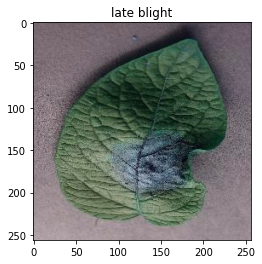

In [63]:
decision(yp1, expanded_dims(test_img_path)[1])

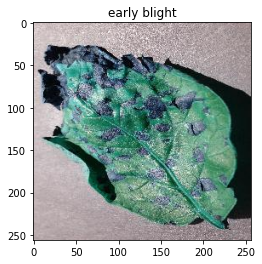

In [64]:
decision(yp2, expanded_dims(test_img_path_2)[1])

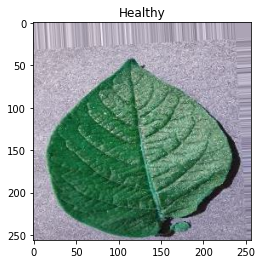

In [65]:
decision(yp3, expanded_dims(test_img_path_3)[1])